<a href="https://colab.research.google.com/github/5234560002ebnida/nonfictioner/blob/main/bollinger_band_strategy_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Timeframe: day


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close    Basis    Upper Band    Lower Band  Buy Signal  \
Date                                                                   
2012-05-17  55500.0      NaN           NaN           NaN           0   
2012-05-18  54300.0      NaN           NaN           NaN           0   
2012-05-21  53600.0      NaN           NaN           NaN           0   
2012-05-22  54800.0      NaN           NaN           NaN           0   
2012-05-23  53800.0      NaN           NaN           NaN           0   
...             ...      ...           ...           ...         ...   
2024-07-18  48750.0  47202.5  51007.548585  43397.451415           0   
2024-07-19  47900.0  46902.5  49083.874506  44721.125494           0   
2024-07-22  48000.0  47007.5  49187.860907  44827.139093           0   
2024-07-23  47350.0  47085.0  49193.653848  44976.346152           0   
2024-07-24  46250.0  47112.5  49158.516669  45066.483331           0   

            Sell Signal  
Date                     
2012-05-17 

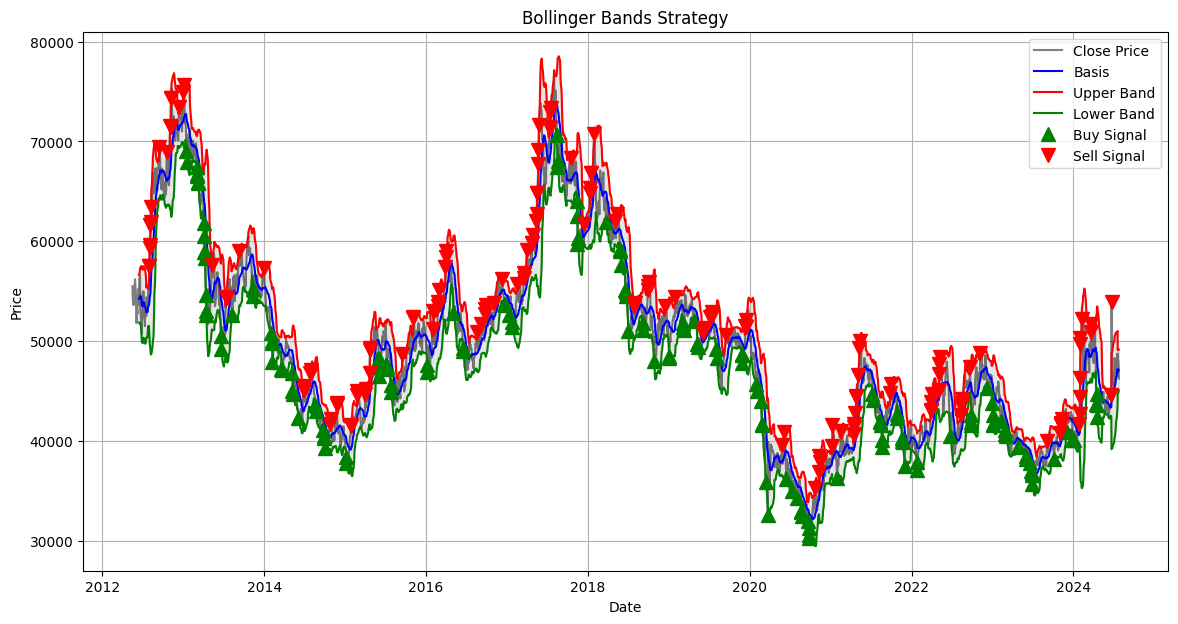


Timeframe: week


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close    Basis    Upper Band    Lower Band  Buy Signal  \
Date                                                                   
2004-08-06  23400.0      NaN           NaN           NaN           0   
2004-08-13  22950.0      NaN           NaN           NaN           0   
2004-08-20  22200.0      NaN           NaN           NaN           0   
2004-08-27  22300.0      NaN           NaN           NaN           0   
2004-09-03  21500.0      NaN           NaN           NaN           0   
...             ...      ...           ...           ...         ...   
2024-06-28  46900.0  46440.0  53007.271323  39872.728677           0   
2024-07-05  48300.0  46420.0  52960.674358  39879.325642           0   
2024-07-12  46400.0  46292.5  52724.023925  39860.976075           0   
2024-07-19  47900.0  46285.0  52708.239058  39861.760942           0   
2024-07-24  46250.0  46162.5  52484.464635  39840.535365           0   

            Sell Signal  
Date                     
2004-08-06 

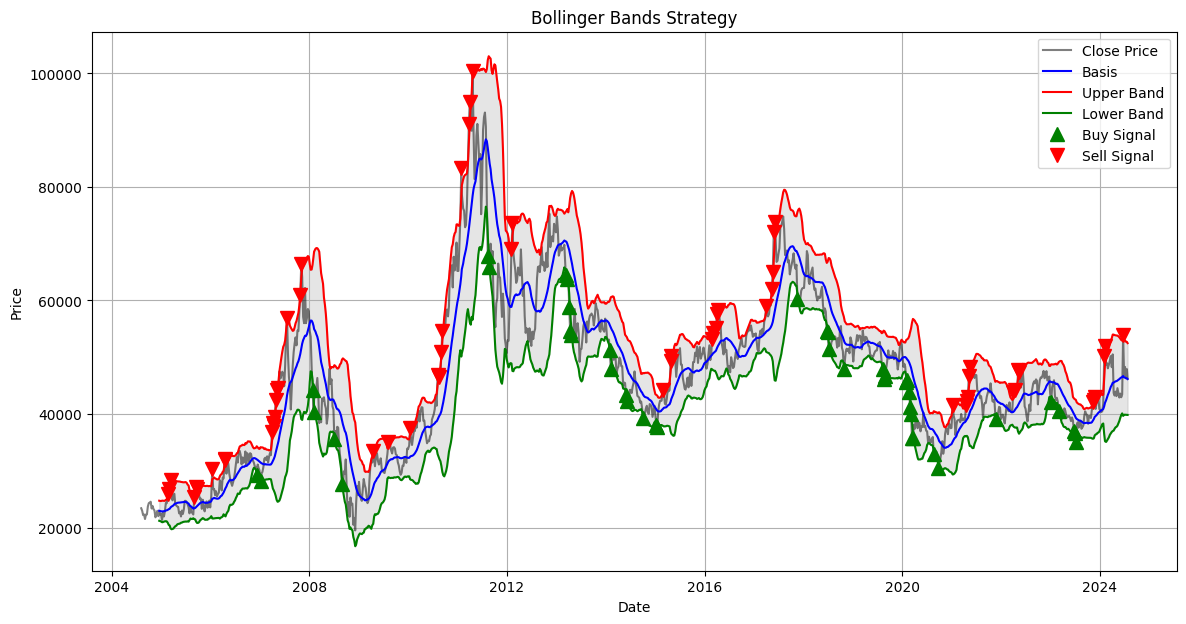


Timeframe: month


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close    Basis    Upper Band    Lower Band  Buy Signal  \
Date                                                                   
2004-08-31  21600.0      NaN           NaN           NaN           0   
2004-09-30  24650.0      NaN           NaN           NaN           0   
2004-10-29  23800.0      NaN           NaN           NaN           0   
2004-11-30  22550.0      NaN           NaN           NaN           0   
2004-12-30  22400.0      NaN           NaN           NaN           0   
...             ...      ...           ...           ...         ...   
2024-03-29  48250.0  42280.0  49936.122421  34623.877579           0   
2024-04-30  44900.0  42222.5  49775.991699  34669.008301           0   
2024-05-31  43600.0  42317.5  49891.088109  34743.911891           0   
2024-06-28  46900.0  42362.5  50038.222150  34686.777850           0   
2024-07-24  46250.0  42245.0  49583.212890  34906.787110           0   

            Sell Signal  
Date                     
2004-08-31 

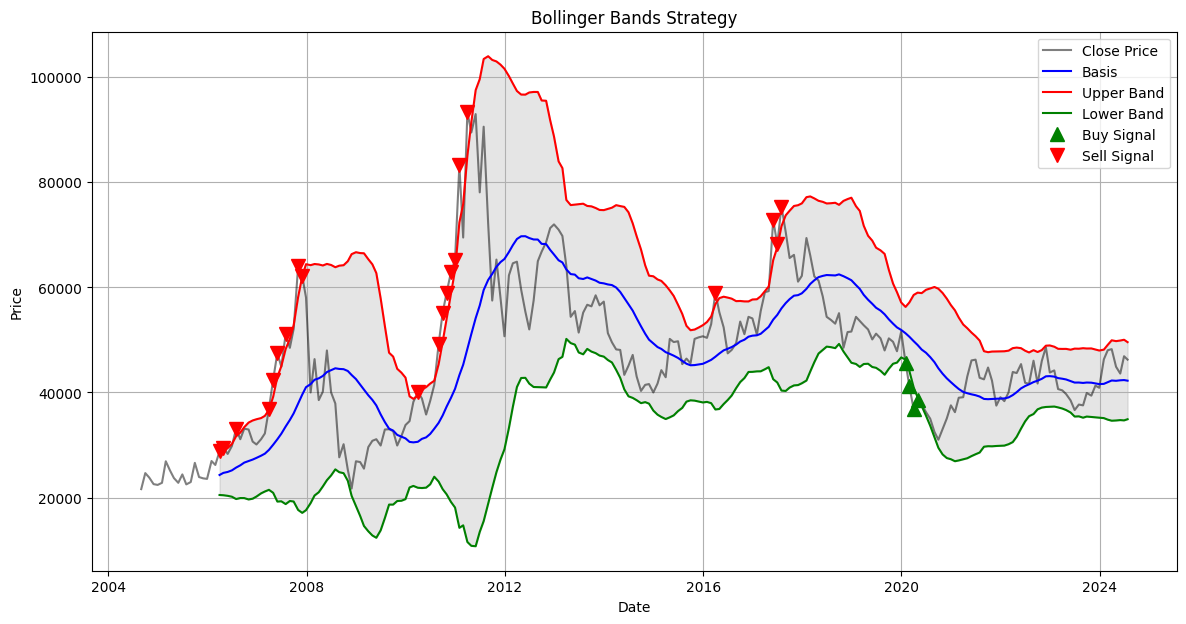

In [9]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def get_price(symbol, startTime, endTime, timeframe='day'):
    count = 3000
    url = f"https://fchart.stock.naver.com/sise.nhn?symbol={symbol}&timeframe={timeframe}&count={count}&requestType=0"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    params = {
        'symbol': symbol,
        'requestType': 1,
        'startTime': startTime,
        'endTime': endTime,
        'timeframe': timeframe
    }

    columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    data = []
    items = soup.select('item')
    for item in items:
        row = item['data'].split('|')
        data.append(row)

    df = pd.DataFrame(data, columns=columns)

    # 'Date' 컬럼을 datetime으로 변환하고 인덱스로 설정
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    return df.astype(float)

def calculate_bollinger_bands(data, length=20, mult=2.0):
    close = data['Close']
    # 중심선 계산
    basis = close.rolling(window=length).mean()
    # 표준편차 계산
    dev = mult * close.rolling(window=length).std()
    # 상단 밴드와 하단 밴드 계산
    upper = basis + dev
    lower = basis - dev

    data['Basis'] = basis
    data['Upper Band'] = upper
    data['Lower Band'] = lower

    # 매수, 매도 신호 계산
    data['Buy Signal'] = np.where(close < lower, 1, 0)
    data['Sell Signal'] = np.where(close > upper, 1, 0)

    return data

def plot_bollinger_bands(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.5)
    plt.plot(data.index, data['Basis'], label='Basis', color='blue')
    plt.plot(data.index, data['Upper Band'], label='Upper Band', color='red')
    plt.plot(data.index, data['Lower Band'], label='Lower Band', color='green')
    plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.2)

    # 매수 신호와 매도 신호 표시
    buy_signals = data[data['Buy Signal'] == 1]
    sell_signals = data[data['Sell Signal'] == 1]
    plt.plot(buy_signals.index, buy_signals['Close'], '^', markersize=10, color='green', lw=0, label='Buy Signal')
    plt.plot(sell_signals.index, sell_signals['Close'], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

    plt.title(f"Bollinger Bands Strategy")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# 사용 예시
symbol = '078930'  # GS종목코드
startTime = '20220501'
endTime = '20220518'

timeframes = ['day', 'week', 'month']
for timeframe in timeframes:
    print(f"\nTimeframe: {timeframe}")
    df = get_price(symbol, startTime, endTime, timeframe)
    df = calculate_bollinger_bands(df)
    print(df[['Close', 'Basis', 'Upper Band', 'Lower Band', 'Buy Signal', 'Sell Signal']])
    plot_bollinger_bands(df)
